In [367]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

In [413]:
x,y=make_classification(n_samples=100,n_features=2,n_informative=2,n_redundant=0,n_classes=2,n_clusters_per_class=1,class_sep=1.5,random_state=10)

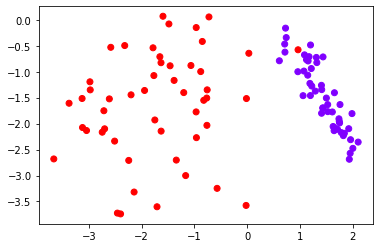

In [414]:
plt.scatter(x[:,0],x[:,1],c=y,cmap='rainbow')
plt.show()

In [370]:
def distance(X,X_):
  return np.sqrt(np.sum((X-X_)**2,axis=1))


In [371]:
def knn(X,Y,X_,k=5):
  l=[]
  for i in range(X_.shape[0]):
    distance_And_Label = np.array(sorted(np.column_stack((distance(X,X_[i]),Y)),key=lambda x : x[0])[:k])
    label_counts=np.unique(distance_And_Label[:,1],return_counts=True)
    majority_label=label_counts[0][np.argmax(label_counts[1])]
    l.append(majority_label)
  return l

In [422]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [424]:
y_pred=knn(x_train,y_train,x_test)

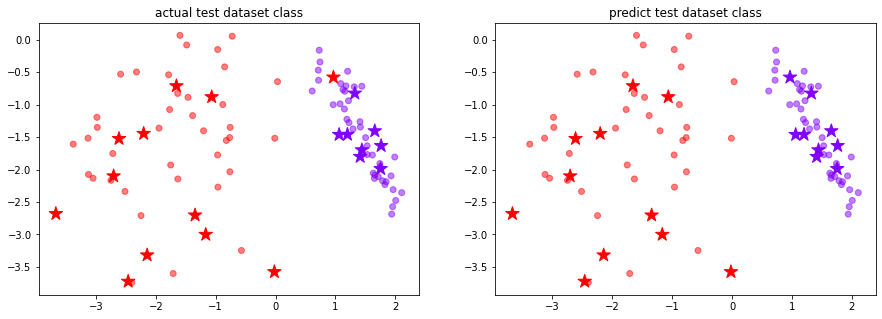

In [439]:
fig,ax=plt.subplots(1,2,figsize=(15,5))
ax[0].scatter(x_train[:,0],x_train[:,1],c=y_train,alpha=0.5,cmap='rainbow')
ax[0].scatter(x_test[:,0],x_test[:,1],c=y_test,s=200,cmap='rainbow',marker='*')
ax[0].set_title('actual test dataset class')
ax[1].scatter(x_train[:,0],x_train[:,1],c=y_train,alpha=0.5,cmap='rainbow')
ax[1].scatter(x_test[:,0],x_test[:,1],c=y_pred,s=200,cmap='rainbow',marker='*')
ax[1].set_title('predict test dataset class')
plt.show()

In [433]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.95